In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.compat.v1.disable_resource_variables()

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

     

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6948 - acc: 0.2557 - val_loss: 0.6947 - val_acc: 0.2552
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6946 - acc: 0.2569 - val_loss: 0.6945 - val_acc: 0.2564
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6944 - acc: 0.2582 - val_loss: 0.6943 - val_acc: 0.2577
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6942 - acc: 0.2594 - val_loss: 0.6941 - val_acc: 0.2589
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.6940 - acc: 0.2606 - val_loss: 0.6939 - val_acc: 0.2601


In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# This is the size of our encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded1)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded2)

# This is our decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


# Load the MNIST dataset
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6936 - acc: 0.2559 - val_loss: 0.6935 - val_acc: 0.2554
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6935 - acc: 0.2569 - val_loss: 0.6934 - val_acc: 0.2565
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6934 - acc: 0.2580 - val_loss: 0.6933 - val_acc: 0.2575
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6933 - acc: 0.2590 - val_loss: 0.6932 - val_acc: 0.2585
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6932 - acc: 0.2600 - val_loss: 0.6931 - val_acc: 0.2595


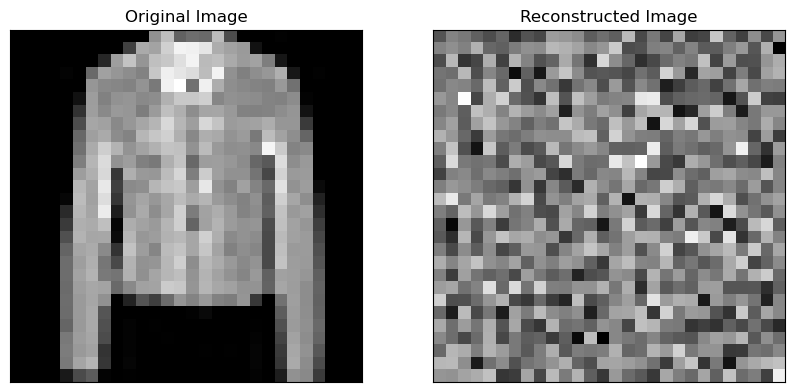

In [12]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Original Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()
     

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

frimport matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()om keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6956 - acc: 0.2588 - val_loss: 0.6955 - val_acc: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.6954 - acc: 0.2596 - val_loss: 0.6953 - val_acc: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6953 - acc: 0.2604 - val_loss: 0.6952 - val_acc: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6951 - acc: 0.2611 - val_loss: 0.6950 - val_acc: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.6949 - acc: 0.2619 - val_loss: 0.6948 - val_acc: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.6948 - acc: 0.2627 - val_loss: 0.6947 - val_acc: 0.0000e+00
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.6946 - 

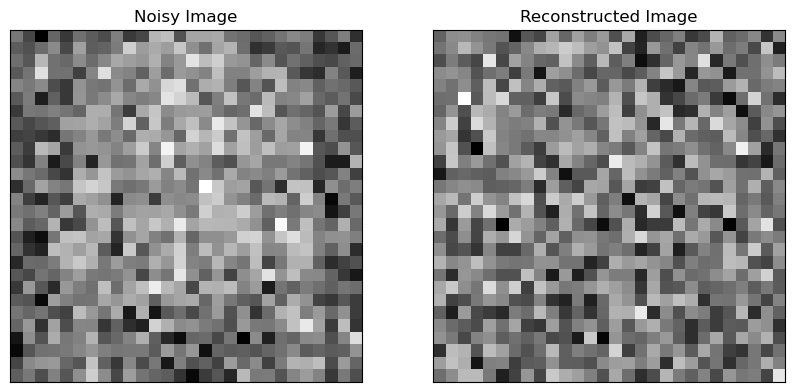

In [11]:
import matplotlib.pyplot as plt

# Get the reconstructed images for the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Choose a random image from the test set
n = 10  # index of the image to be plotted
plt.figure(figsize=(10, 5))

# Plot the original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Noisy Image")

# Plot the reconstructed image
ax = plt.subplot(1, 2, 2)
plt.imshow(reconstructed_imgs[n].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("Reconstructed Image")

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.6913 - acc: 0.2807 - val_loss: 0.6912 - val_acc: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6911 - acc: 0.2814 - val_loss: 0.6910 - val_acc: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6910 - acc: 0.2821 - val_loss: 0.6909 - val_acc: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6909 - acc: 0.2828 - val_loss: 0.6908 - val_acc: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6907 - acc: 0.2835 - val_loss: 0.6906 - val_acc: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6906 - acc: 0.2842 - val_loss: 0.6905 - val_acc: 0.0000e+00
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6905 - ac

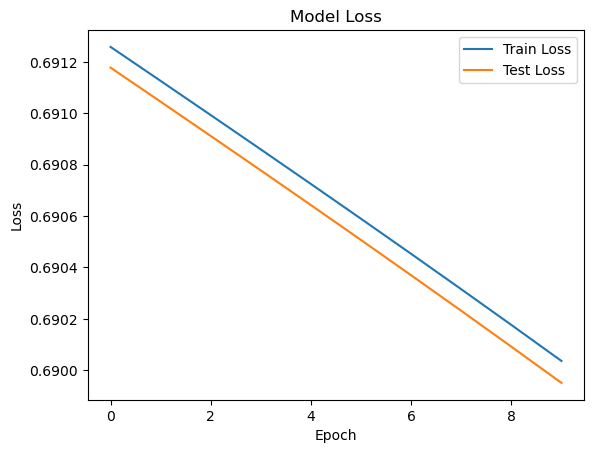

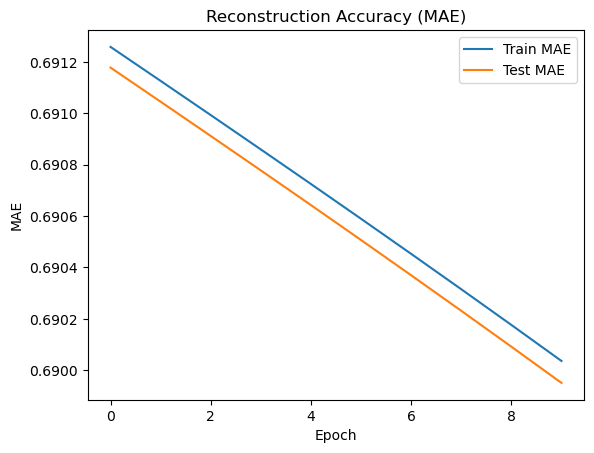

In [22]:
import matplotlib.pyplot as plt

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

# Plot the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate reconstruction accuracy using Mean Absolute Error (MAE)
train_mae = history.history['loss']
test_mae = history.history['val_loss']

# Plot the MAE
plt.plot(train_mae, label='Train MAE')
plt.plot(test_mae, label='Test MAE')
plt.title('Reconstruction Accuracy (MAE)')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

